<hr><b><span style="font-size:50px;"> Bank Customer Segmentation Methods </span></b>

# Table of Contents
* [1. Introduction](#chapter1)
* [2. Used Libraries](#chapter2)
* [3. Data in the Project](#chapter3)
    * [3.1 Description of Variables](#section_3_1)
    * [3.2 Reading the Dataset](#section_3_2)
    * [3.3 Data Preprocessing](#section_3_3)
        * [3.3.1 Checking Data Types of Variables](#sub_section_3_3_1)
        * [3.3.2 Searching for Duplicates](#sub_section_3_3_2)
        * [3.3.3 Missing Values Calculation and Removal](#sub_section_3_3_3)
        * [3.3.4 Renaming Columns](#sub_section_3_3_4)
        * [3.3.5 Handling Inconsistent Data](#sub_section_3_3_5)
        * [3.3.6 Feature Engineering](#sub_section_3_3_6)
        * [3.3.7 Data Cleaning](#sub_section_3_3_7)
* [4. Exploratory Data Analysis (EDA)](#chapter4)
    * [4.1 Statistics Summary](#section_4_1)
    * [4.2 Univariate Analysis](#section_4_2)
* [5. Data Transformation](#chapter5)
    * [5.1 Handling Skewness](#section_5_1)
        * [5.1.1 Quantile Transformation](#sub_section_5_1_1)
        * [5.1.2 Yeo-Johnson Transformation](#sub_section_5_1_2)
    * [5.2 Data Scaling](#section_5_2)
* [6. Data Reduction](#chapter6)
    * [6.1 Searching Highly Correlated Variables](#section_6_1)
    * [6.2 Principal Component Analysis (PCA)](#section_6_2)
* [7. Clustering methods](#chapter7)
    * [7.1 K-Means](#section_7_1)
        * [7.1.1 Silhouette Score Plot](#sub_section_7_1_1)
        * [7.1.2 Silhouette Diagram](#sub_section_7_1_2)
        * [7.1.3 Algorithm](#sub_section_7_1_3)  
    * [7.2 DBSCAN](#section_7_2)
        * [7.2.1 k-NN Distance Plot](#sub_section_7_2_1)
        * [7.2.2 Searching optimal min_samples](#sub_section_7_2_2)
        * [7.2.3 Algorithm](#sub_section_7_2_3)
    * [7.3 Agglomerative Clustering](#section_7_3)
        * [7.3.1 Denrogram](#sub_section_7_3_1)
        * [7.3.2 Algorithm](#sub_section_7_3_2)
    * [7.4 Affinity Propagation](#section_7_4)
    * [7.5 Spectral Clustering](#section_7_5)
        * [7.5.1 Silhouette Score Plot](#sub_section_7_5_1)
        * [7.5.2 Algorithm](#sub_section_7_5_2)
    * [7.6 Gaussian Mixture Model](#section_7_6)
        * [7.6.1 BIC / AIC Criterion](#sub_section_7_6_1)
        * [7.6.2 Algorithm](#sub_section_7_6_2)
* [8. Summary](#chapter8)

# 1. Introduction <a class="anchor" id="chapter1"></a>

Cluster analysis is the task of grouping objects into sets (clusters) based on their similarity. The goal of clustering is to identify natural groups in the data, where objects in one cluster are more similar to each other than to objects in other clusters. Clustering is an Unsupervised Learning task because the process takes place without prior knowledge of class labels.

The main goal of this project is to present different clustering methods to the readers by using these techniques in **Bank Customer Segmentation**. Each clustering algorithm is thoroughly described to provide a better understanding of the topic. The project is created using the Python programming language in a Jupyter Notebook.

# 2. Used Libraries <a id="chapter2"></a>

In [1]:
# indispensable libraries
import numpy as np
import re
import pandas as pd
pd.options.display.max_columns = None

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.colors as pc
import plotly.express as px
import plotly.graph_objects as go
from yellowbrick.cluster import SilhouetteVisualizer
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D 
from IPython.display import HTML

# clustering algorithms, ML metrics and optimization
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, OPTICS, AffinityPropagation, Birch, AgglomerativeClustering, \
                            SpectralClustering, MeanShift
from scipy.cluster import hierarchy
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# data transformation
from scipy.stats import yeojohnson
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler

# data reduction
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# 3. Data in the Project  <a id="chapter3"></a>

The project's dataset was obtained from [Kaggle: Your Machine Learning and Data Science Community](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download). It consists of approximately **9,000 observations with 18 features**. The dataset summarizes the usage behavior of active credit card holders over a six-month period. The task is to develop customer segmentation to define the bank's marketing strategy.

## 3.1 Description of Variables <a id="section_3_1"></a>

The meanings of the individual variables are as follows:
- **CUST_ID** - Identification of credit card holder.
- **BALANCE** - Balance amount left in the account for making purchases.
- **BALANCE_FREQUENCY** - Frequency of balance updates, scored between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
- **PURCHASES** - Total amount of purchases made from the account.
- **ONEOFF_PURCHASES** - Maximum amount of a single purchase made in one go.
- **INSTALLMENTS_PURCHASES** - Amount of purchase done in installment.
- **CASH_ADVANCE** - Cash in advance given by the user.
- **PURCHASES_FREQUENCY** - Frequency of purchases, scored between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- **ONEOFF_PURCHASES_FREQUENCY** - Frequency of single purchases made in one go (1 = frequently purchased, 0 = not frequently purchased).
- **PURCHASES_INSTALLMENTS_FREQUENCY** - Frequency of purchases made in installments (1 = frequently done, 0 = not frequently done).
- **CASH_ADVANCE_FREQUENCY** - How frequently the cash in advance being paid.
- **CASH_ADVANCE_TRX** - Number of Transactions made with "Cash in Advanced".
- **PURCHASES_TRX** - Number of purchase transactions made.
- **CREDIT_LIMIT** - The maximum amount of money that a credit card holder can spend using their credit card.
- **PAYMENTS** - Amount of Payment made by the user.
- **MINIMUM_PAYMENTS** - Minimum amount of payments made by the user.
- **PRC_FULL_PAYMENT** - Percent of full payment made by the user.
- **TENURE** - Tenure of credit card service for user.

## 3.2 Reading the Dataset <a id="section_3_2"></a>

The Pandas library offers the **read_csv()** function, which is used for loading data into a Pandas DataFrame from a .csv file.

In [2]:
customers_df = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')

In the beginning stages of working with data, it is crucial to generate insights about the dataset, such as its size, column names, and the values within it. This allows a Data Scientist to identify any inconsistencies in the data and its format. While some errors can be well-hidden, a simple initial display can often reveal what further steps should be taken during the project.

In [3]:
customers_df.head(4)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12

In [4]:
customers_df.shape

(8950, 18)

Dimensions presented above indicate that the analysed dataset has **8950 observations and 18 variables**.

## 3.3 Data Preprocessing  <a id="section_3_3"></a>

Data Preprocessing is a project step where raw data is transformed into an understandable format for used algorithms. It consists of multiple so-called 'mini steps,' each responsible for different operations on the data. There is no single correct order for performing data preprocessing; it depends on the project's goals and the researcher's perspective. Real-world data is usually incomplete, noisy, and has inappropriate data formats. Therefore, Data Preprocessing is performed to handle these issues.

### 3.3.1 Checking Data Types of Variables <a id="sub_section_3_3_1"></a>

It is wise to start Data Preprocessing by gaining an understanding of the data types of attributes and the number of records. To obtain this information, the **info()** function is used.

In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### 3.3.2 Searching for Duplicates <a id="sub_section_3_3_2"></a>

The next 'mini step' in Data Preprocessing is removing duplicates from the dataset. In a clustering problem, unremoved duplicates can overlap and obscure each other in visualizations, making it difficult to accurately interpret the clusters. Furthermore, unnecessary observations can increase processing time for clustering algorithms, leading to inefficient use of computational resources and extended processing times.

In [6]:
customers_df.duplicated().sum()

0

In this case there are not any duplicates to be removed.

### 3.3.3 Missing Values Calculation and Removal <a id="sub_section_3_3_3"></a>

Another crucial 'mini step' is searching for and removing missing values. Handling missing data is essential to avoid issues in subsequent data operations and to prevent execution problems with used algorithms.

In [7]:
customers_df.isna().sum(axis = 0)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

The numbers printed above indicate that there are missing values in the variables **'CREDIT_LIMIT'** and **'MINIMUM_PAYMENTS'**. Records with NaN values in these variables are removed from the dataset because they are not numerous, and their removal will not negatively impact the analysis.

In [8]:
customers_df = customers_df.dropna()

### 3.3.4 Renaming Columns <a id="sub_section_3_3_4"></a>

It is also good practice to rename columns that have excessively long names. Additionally, it is a good practice to use lowercase letters when naming variables.

In [9]:
old_names = customers_df.columns.tolist()
new_names = ['cust_id', 'balance', 'bal_freq', 'purchases', 'oneoff_purch', 'inst_purch', 'cash_adv', 'purch_freq', 
             'oneoff_purch_freq', 'inst_purch_freq', 'cash_adv_freq', 'cash_adv_trx', 'purch_trx', 'credit_lim',
             'payments', 'min_payments', 'prc_full_pay', 'tenure']

customers_df.rename(columns = dict(zip(old_names, new_names)), inplace = True)

In [10]:
customers_df.head(4)

cust_id      balance  bal_freq  purchases  oneoff_purch  inst_purch  \
0  C10001    40.900749  0.818182      95.40          0.00        95.4   
1  C10002  3202.467416  0.909091       0.00          0.00         0.0   
2  C10003  2495.148862  1.000000     773.17        773.17         0.0   
4  C10005   817.714335  1.000000      16.00         16.00         0.0   

      cash_adv  purch_freq  oneoff_purch_freq  inst_purch_freq  cash_adv_freq  \
0     0.000000    0.166667           0.000000         0.083333           0.00   
1  6442.945483    0.000000           0.000000         0.000000           0.25   
2     0.000000    1.000000           1.000000         0.000000           0.00   
4     0.000000    0.083333           0.083333         0.000000           0.00   

   cash_adv_trx  purch_trx  credit_lim     payments  min_payments  \
0             0          2      1000.0   201.802084    139.509787   
1             4          0      7000.0  4103.032597   1072.340217   
2             0         12      7500.0   622.066742    627.284787   
4             0          1      1200.0   678.334763    244.791237   

   prc_full_pay  tenure  
0      0.000000      12  
1      0.222222      12  
2      0.000000      12  
4      0.000000      12

### 3.3.5 Handling Inconsistent Data <a id="sub_section_3_3_5"></a>

Despite declarations that all values have the correct format and range, it is always prudent to verify this through additional checks. For this purpose, you can use pattern matching and other validation techniques. In this case, you will search inconsistencies in the variable **'cust_id'**.

An important step is to check whether all column values adhere to the proper pattern. If any inconsistencies are found, their indices will be printed out in a list.

In [11]:
def checking_customer_id_format(col):
    pattern = re.compile(r'^C\d{5}$')
    invalid_indices = []
    
    for idx, rec in enumerate(col):
        if not pattern.match(rec):
            invalid_indices.append(idx)
    
    print(invalid_indices)

In [12]:
checking_customer_id_format(customers_df['cust_id'])

[]


No inappropriate values were found in checked column.

### 3.3.6 Data Cleaning <a id="sub_section_3_3_7"></a>

Reduction of outliers is extremely important part of every project somehow related with data. From definition an outlier is a data point that significantly differ from the rest of the dataset. These outliers can distort statistical analyses and models what leads to inaccurate results. By removing, transforming or replacing these extreme values, the integrity and accuracy of the data are maintained.

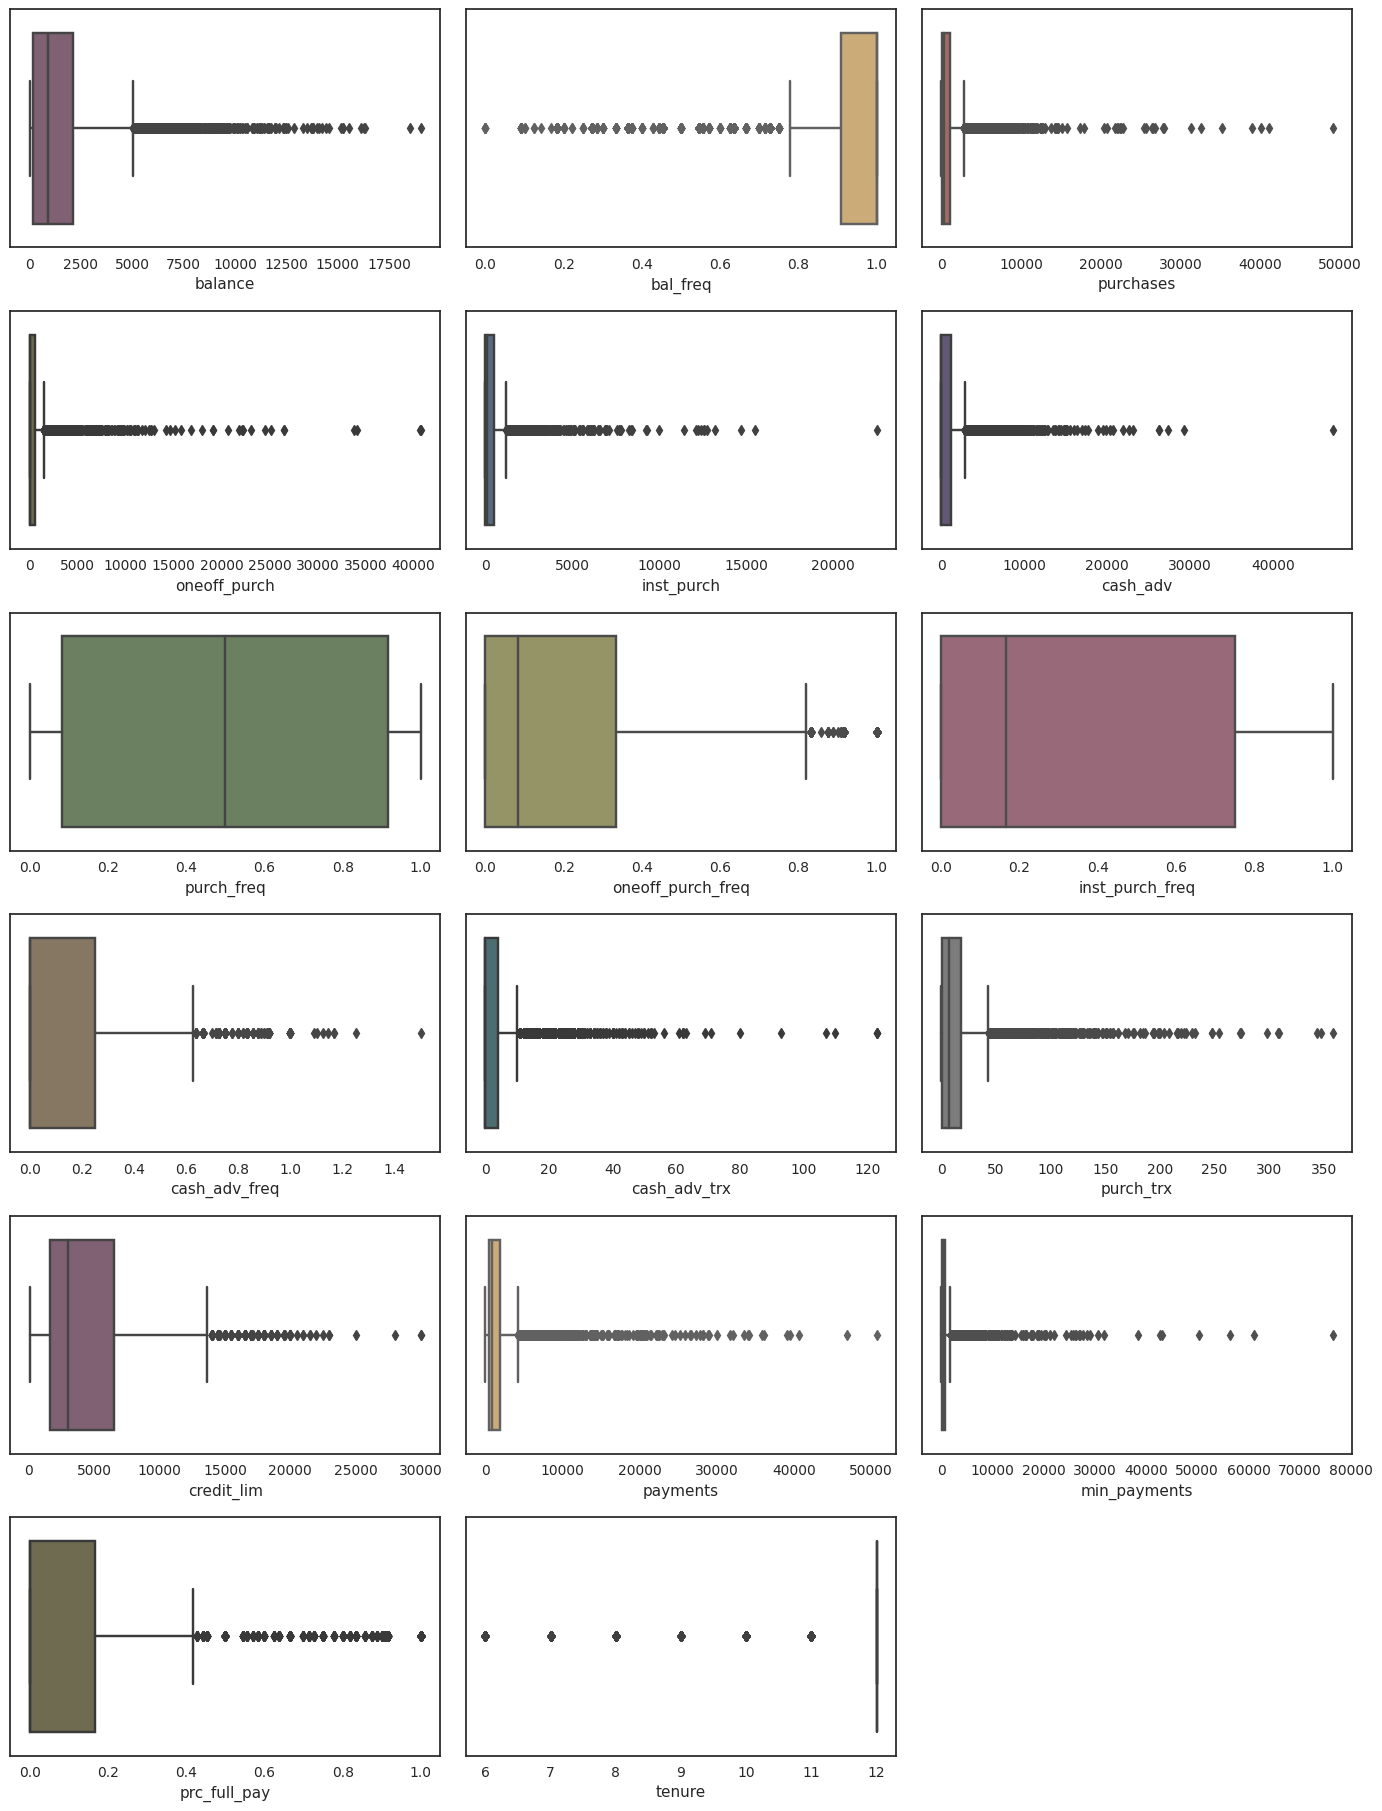

In [13]:
num_columns = customers_df.select_dtypes(include=['int64', 'float64']).columns

antique_palette = ['#855C75FF', '#D9AF6BFF', '#AF6458FF', '#736F4CFF', '#526A83FF', '#625377FF', '#68855CFF', '#9C9C5EFF', 
                   '#A06177FF', '#8C785DFF', '#467378FF', '#7C7C7CFF']

sns.set_style('white')
plt.figure(figsize = (14, len(num_columns) * 3))

for idx, feature in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 3, idx)
    color_idx = (idx - 1) % len(antique_palette)
    sns.boxplot(data = customers_df, x = feature, color = antique_palette[color_idx])

plt.tight_layout()
plt.show()

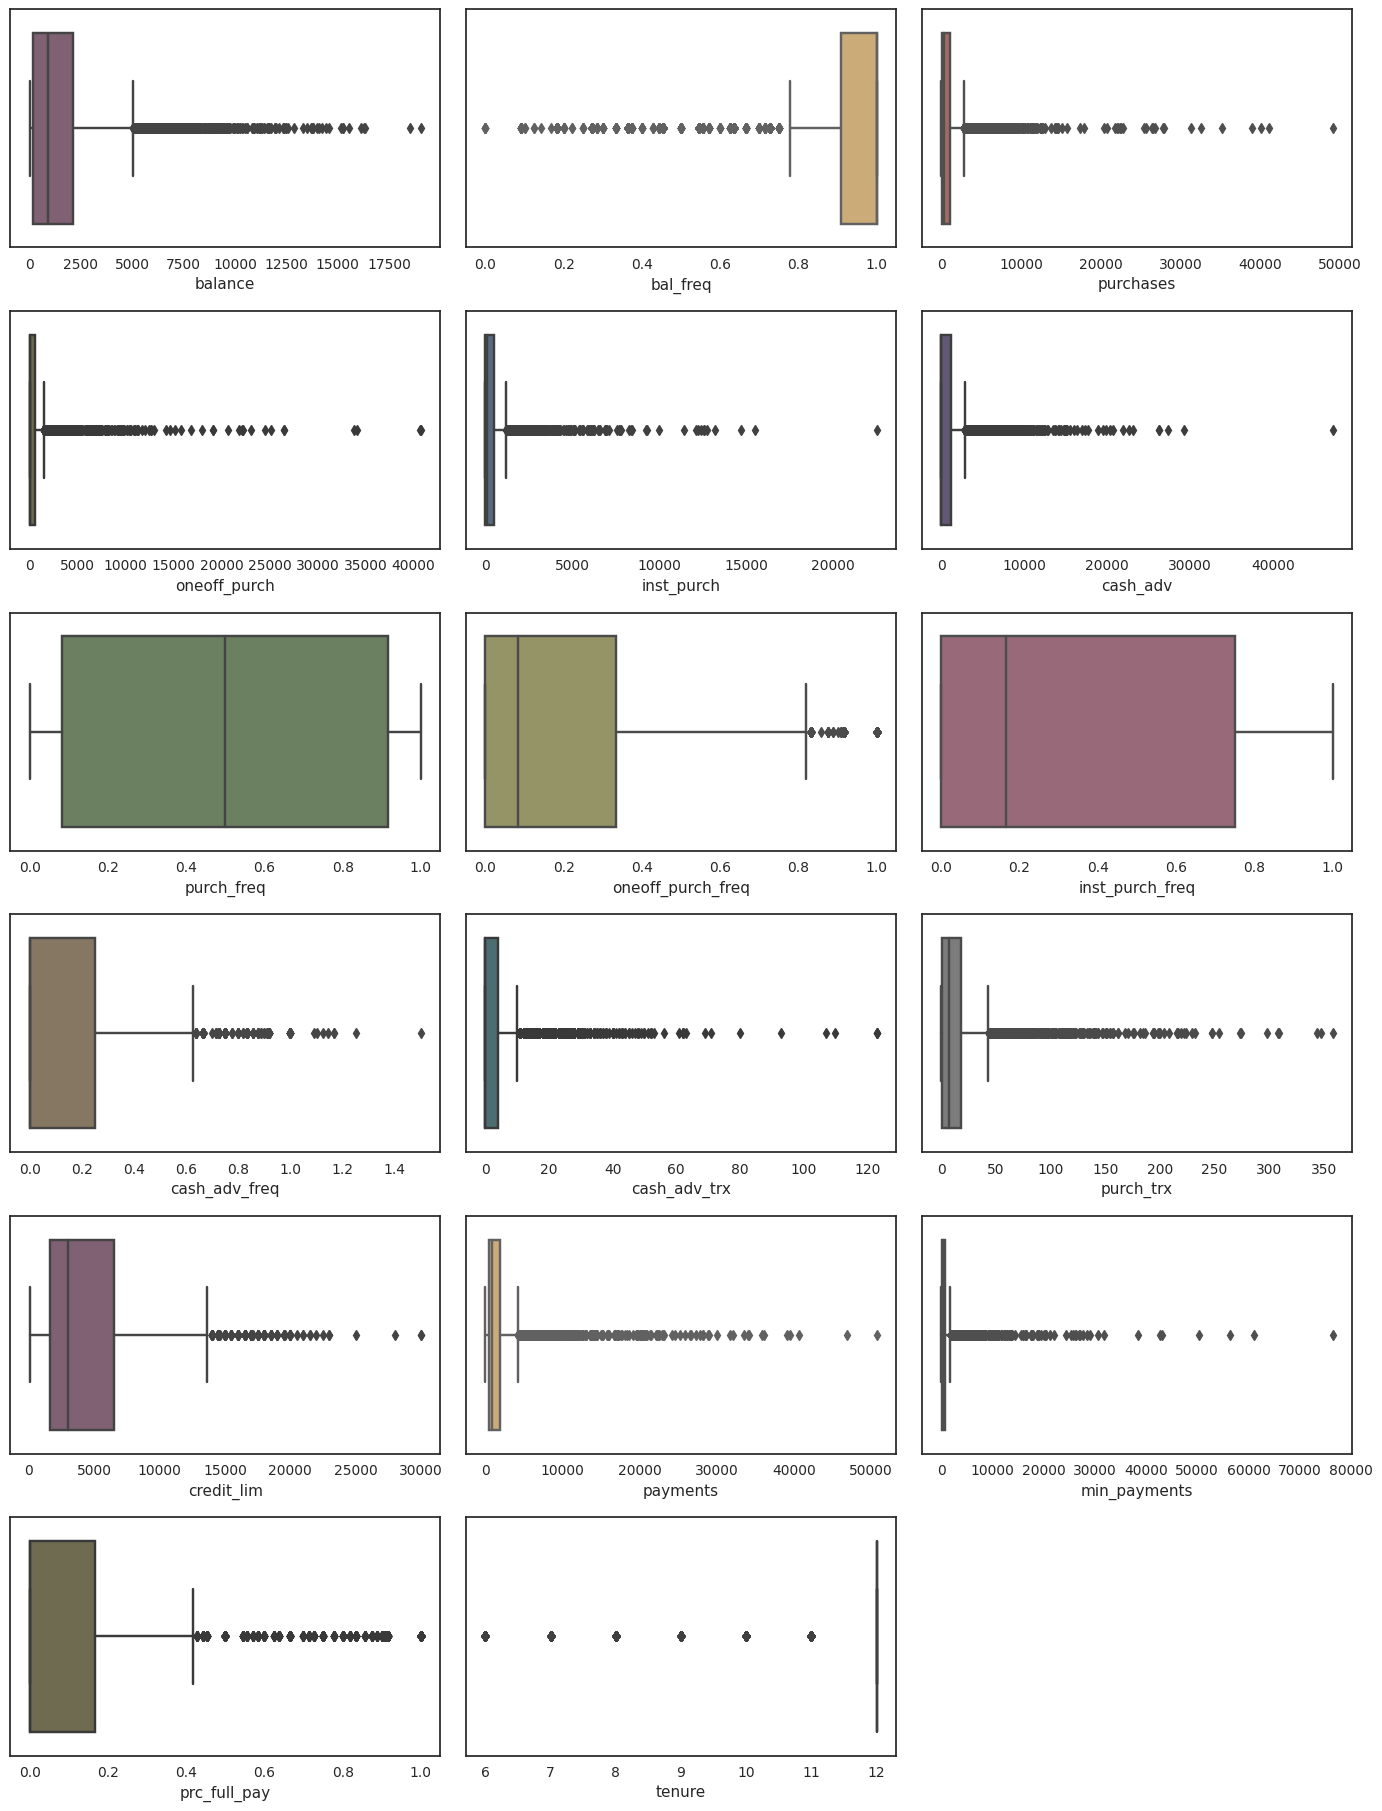

In [13]:
num_columns = customers_df.select_dtypes(include=['int64', 'float64']).columns

antique_palette = ['#855C75FF', '#D9AF6BFF', '#AF6458FF', '#736F4CFF', '#526A83FF', '#625377FF', '#68855CFF', '#9C9C5EFF', 
                   '#A06177FF', '#8C785DFF', '#467378FF', '#7C7C7CFF']

sns.set_style('white')
plt.figure(figsize = (14, len(num_columns) * 3))

for idx, feature in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 3, idx)
    color_idx = (idx - 1) % len(antique_palette)
    sns.boxplot(data = customers_df, x = feature, color = antique_palette[color_idx])

plt.tight_layout()
plt.show()

It's a common practice to address outliers when preparing data for clustering algorithms, such as K-Means, which can be sensitive to outliers. However, as you've pointed out, not all outliers should be removed indiscriminately. Here’s how you can approach handling outliers, especially considering that some variables like **'tenure'** or those, that represent frequencies, might be crucial for analysis and should not be removed.

In [14]:
customers_df = customers_df[customers_df['balance'] < 15000]
customers_df = customers_df[customers_df['purchases'] < 15000]
customers_df = customers_df[customers_df['oneoff_purch'] < 13000]
customers_df = customers_df[customers_df['inst_purch'] < 1000]
customers_df = customers_df[customers_df['cash_adv'] < 24000]
customers_df = customers_df[customers_df['cash_adv_freq'] <= 1.0] # This is an exception, because freq should be in range 0 - 1
customers_df = customers_df[customers_df['cash_adv_trx'] < 55]
customers_df = customers_df[customers_df['purch_trx'] < 240]
customers_df = customers_df[customers_df['credit_lim'] < 13500]
customers_df = customers_df[customers_df['payments'] < 23000]
customers_df = customers_df[customers_df['min_payments'] < 24000]
customers_df = customers_df[customers_df['prc_full_pay'] < 0.405] # 0.42

In [15]:
customers_df = customers_df.drop(['cust_id'], axis = 1)

In [16]:
customers_df.shape

(6333, 17)

# 4. Exploratory Data Analysis (EDA) <a id="chapter4"></a>

Exploratory Data Analysis (EDA) is another important step in a project. Through the use of summary statistics and visualizations, patterns can be discovered. These insights may lead to conclusions about whether certain assumptions are true or not. I am not going to dive deep into this topic, because it is not main goal of this project.

## 4.1 Statistics Summary <a id="section_4_1"></a>

In Python, the **describe()** function is used to obtain summary statistics for a dataset. Below are the statistics generated for numerical attributes.

In [17]:
customers_df.describe(include = ['float64', 'int64']).T

count         mean          std         min          25%  \
balance            6333.0  1638.704958  1816.995148    0.000000   308.769481   
bal_freq           6333.0     0.899560     0.205677    0.000000     0.909091   
purchases          6333.0   545.546760   951.183495    0.000000     0.000000   
oneoff_purch       6333.0   388.921140   881.890585    0.000000     0.000000   
inst_purch         6333.0   156.932844   239.384730    0.000000     0.000000   
cash_adv           6333.0  1087.371054  1915.954899    0.000000     0.000000   
purch_freq         6333.0     0.390187     0.380491    0.000000     0.000000   
oneoff_purch_freq  6333.0     0.165339     0.259356    0.000000     0.000000   
inst_purch_freq    6333.0     0.264566     0.355625    0.000000     0.000000   
cash_adv_freq      6333.0     0.160760     0.203616    0.000000     0.000000   
cash_adv_trx       6333.0     3.702669     6.123249    0.000000     0.000000   
purch_trx          6333.0     8.845097    13.176226    0.000000     0.000000   
credit_lim         6333.0  3923.013970  2934.267207  150.000000  1500.000000   
payments           6333.0  1362.380750  1854.394390    0.049513   364.834065   
min_payments       6333.0   785.797918  1468.645036    0.019163   185.091037   
prc_full_pay       6333.0     0.038014     0.084051    0.000000     0.000000   
tenure             6333.0    11.512080     1.329623    6.000000    12.000000   

                           50%          75%          max  
balance            1093.946163  2230.477487  12373.33348  
bal_freq              1.000000     1.000000      1.00000  
purchases           227.440000   674.300000  12650.00000  
oneoff_purch          0.000000   412.000000  12650.00000  
inst_purch            0.000000   250.000000    999.96000  
cash_adv            168.514165  1418.626391  20277.33112  
purch_freq            0.250000     0.750000      1.00000  
oneoff_purch_freq     0.000000     0.250000      1.00000  
inst_purch_freq       0.000000     0.500000      1.00000  
cash_adv_freq         0.083333     0.250000      1.00000  
cash_adv_trx          1.000000     5.000000     53.00000  
purch_trx             4.000000    12.000000    217.00000  
credit_lim         3000.000000  6000.000000  13450.00000  
payments            738.457844  1567.278435  22099.47812  
min_payments        386.817488   856.508162  20551.61978  
prc_full_pay          0.000000     0.000000      0.40000  
tenure               12.000000    12.000000     12.00000

## 4.2 Univariate Analysis <a id="section_4_2"></a>

For the numerical variables histograms are created to identify skewed data distributions. Skewed variables can have negative impact on clustering, leading to increased number of mistakes.

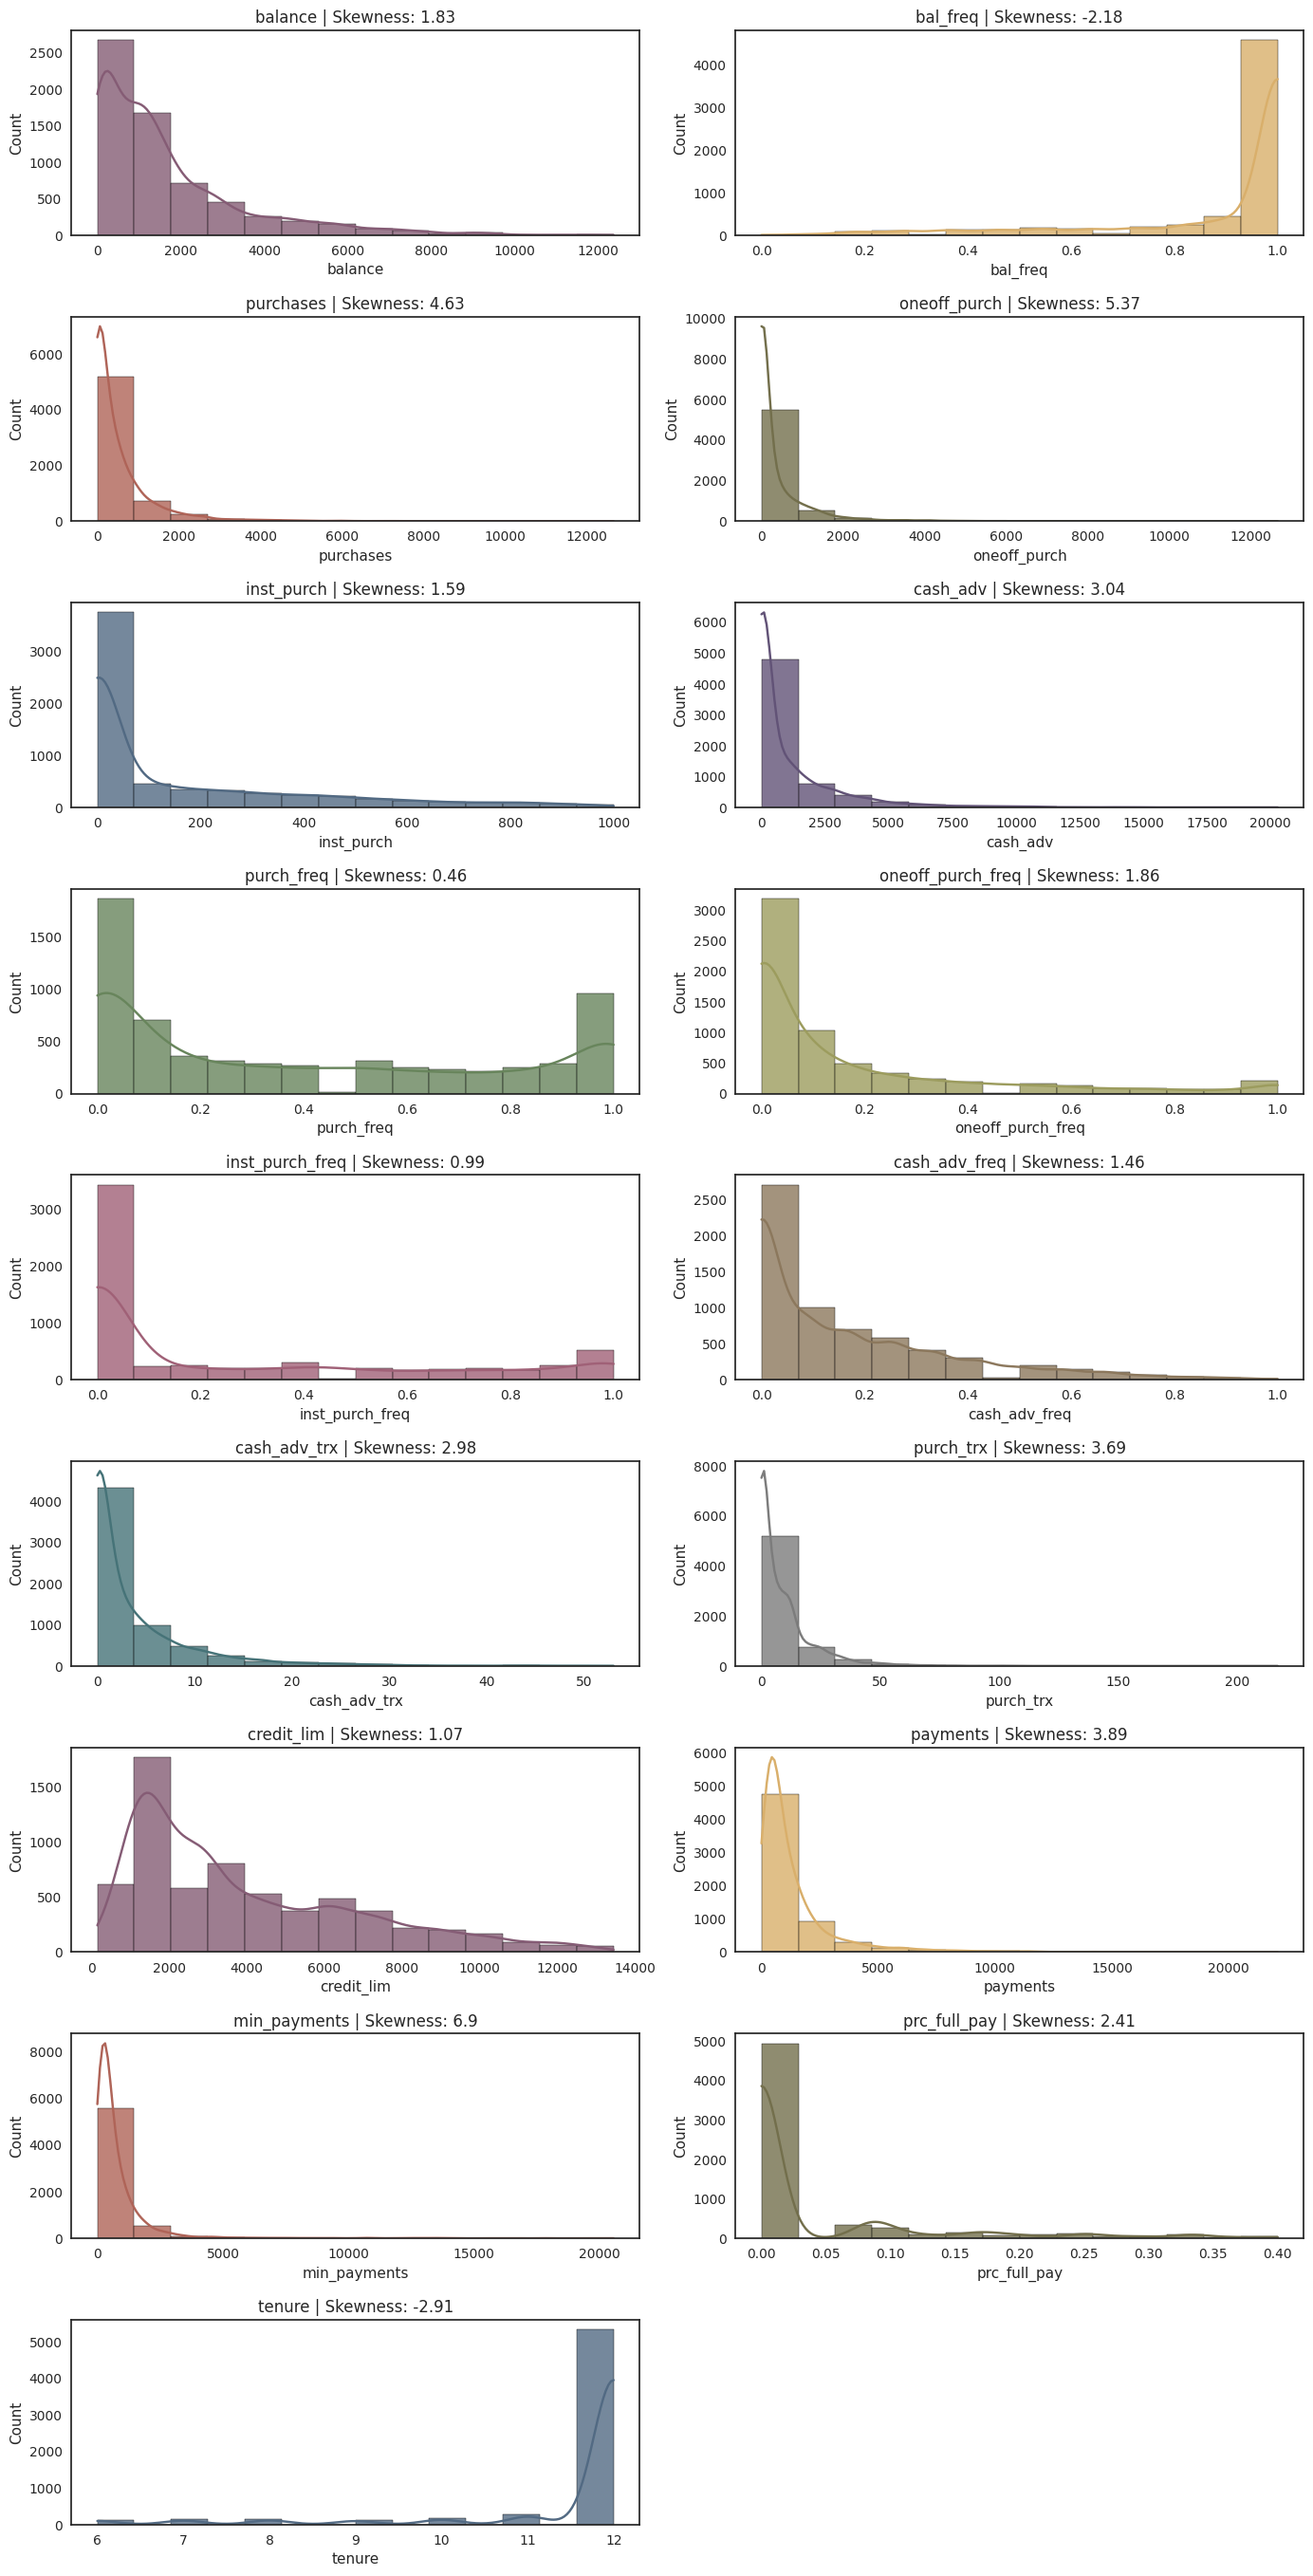

In [18]:
num_columns = customers_df.select_dtypes(include = ['int64', 'float64']).columns

sns.set_style('white')
plt.figure(figsize = (14, len(num_columns) * 3))

for idx, feature in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 2, idx)
    color_idx = (idx - 1) % len(antique_palette)
    sns.histplot(customers_df[feature], bins = 'sturges', kde = True, color = antique_palette[color_idx], alpha = 0.8, 
                     edgecolor = 'black')
    plt.title(f"{feature} | Skewness: {round(customers_df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

The histograms presented above indicate that all considered variables are either right or left skewed. They provide information on the extent of the skewness and suggest which transformation should be applied in order to reduce this skewness.

# 5. Data Transformation <a id="chapter5"></a>

Data Transformation is the process of converting data from one format or structure into another. This process is essential in analysis and visualization to ensure that the data is in the right form for both mentioned tasks.

## 5.1 Handling Skewness <a id="section_5_1"></a>

There are numerous strategies for addressing skewness, such as:
- Log Transformation
- Square Root Transformation
- Cubed Transformation
- Box-Cox Transformation
- Yeo-Johnson Transformation
- Quantile Transformation
- and more. <br>

However, not all of these can be applied to address right or left skewness in this particular problem. I will briefly describe the transformations applied in this project. Through numerous experiments conducted on the data, these transformations proved to be the most effective in this case.

### 5.1.1 Quantile Transformation <a id="sub_section_5_1_1"></a>

A Quantile Transformation is a technique used to transform the features of a dataset such that they follow a uniform or normal distribution. This is achieved by mapping the original data to a uniform or normal distribution using the cumulative distribution function of the data. The main goal of a quantile transformation is to reduce the impact of outliers and make the data more suitable for various machine learning algorithms that assume normality or uniformity of the data distribution. In other words it tames skewness.

In [19]:
qt_normal = QuantileTransformer(n_quantiles = 100, output_distribution = 'normal')

qt_normal_col = ['balance', 'credit_lim','payments', 'min_payments']

for feature in qt_normal_col:
    customers_df[feature] = qt_normal.fit_transform(customers_df[[feature]])

### 5.1.2 Yeo-Johnson Transformation <a id="sub_section_5_1_2"></a>

The Yeo-Johnson Transformation is a technique used to stabilize variance and make the data more normally distributed. It is particularly useful for transforming both positive and non-positive data, which the similar Box-Cox transformation cannot handle. The Yeo-Johnson transformation applies a power transformation to the data, which can correct skewness and make the data more suitable for various clustering algorithms.

In [20]:
yeojohnson_col = list(set(customers_df.columns.to_list()) - set(qt_normal_col))

for feature in yeojohnson_col:
    customers_df[feature], _ = yeojohnson(customers_df[feature])

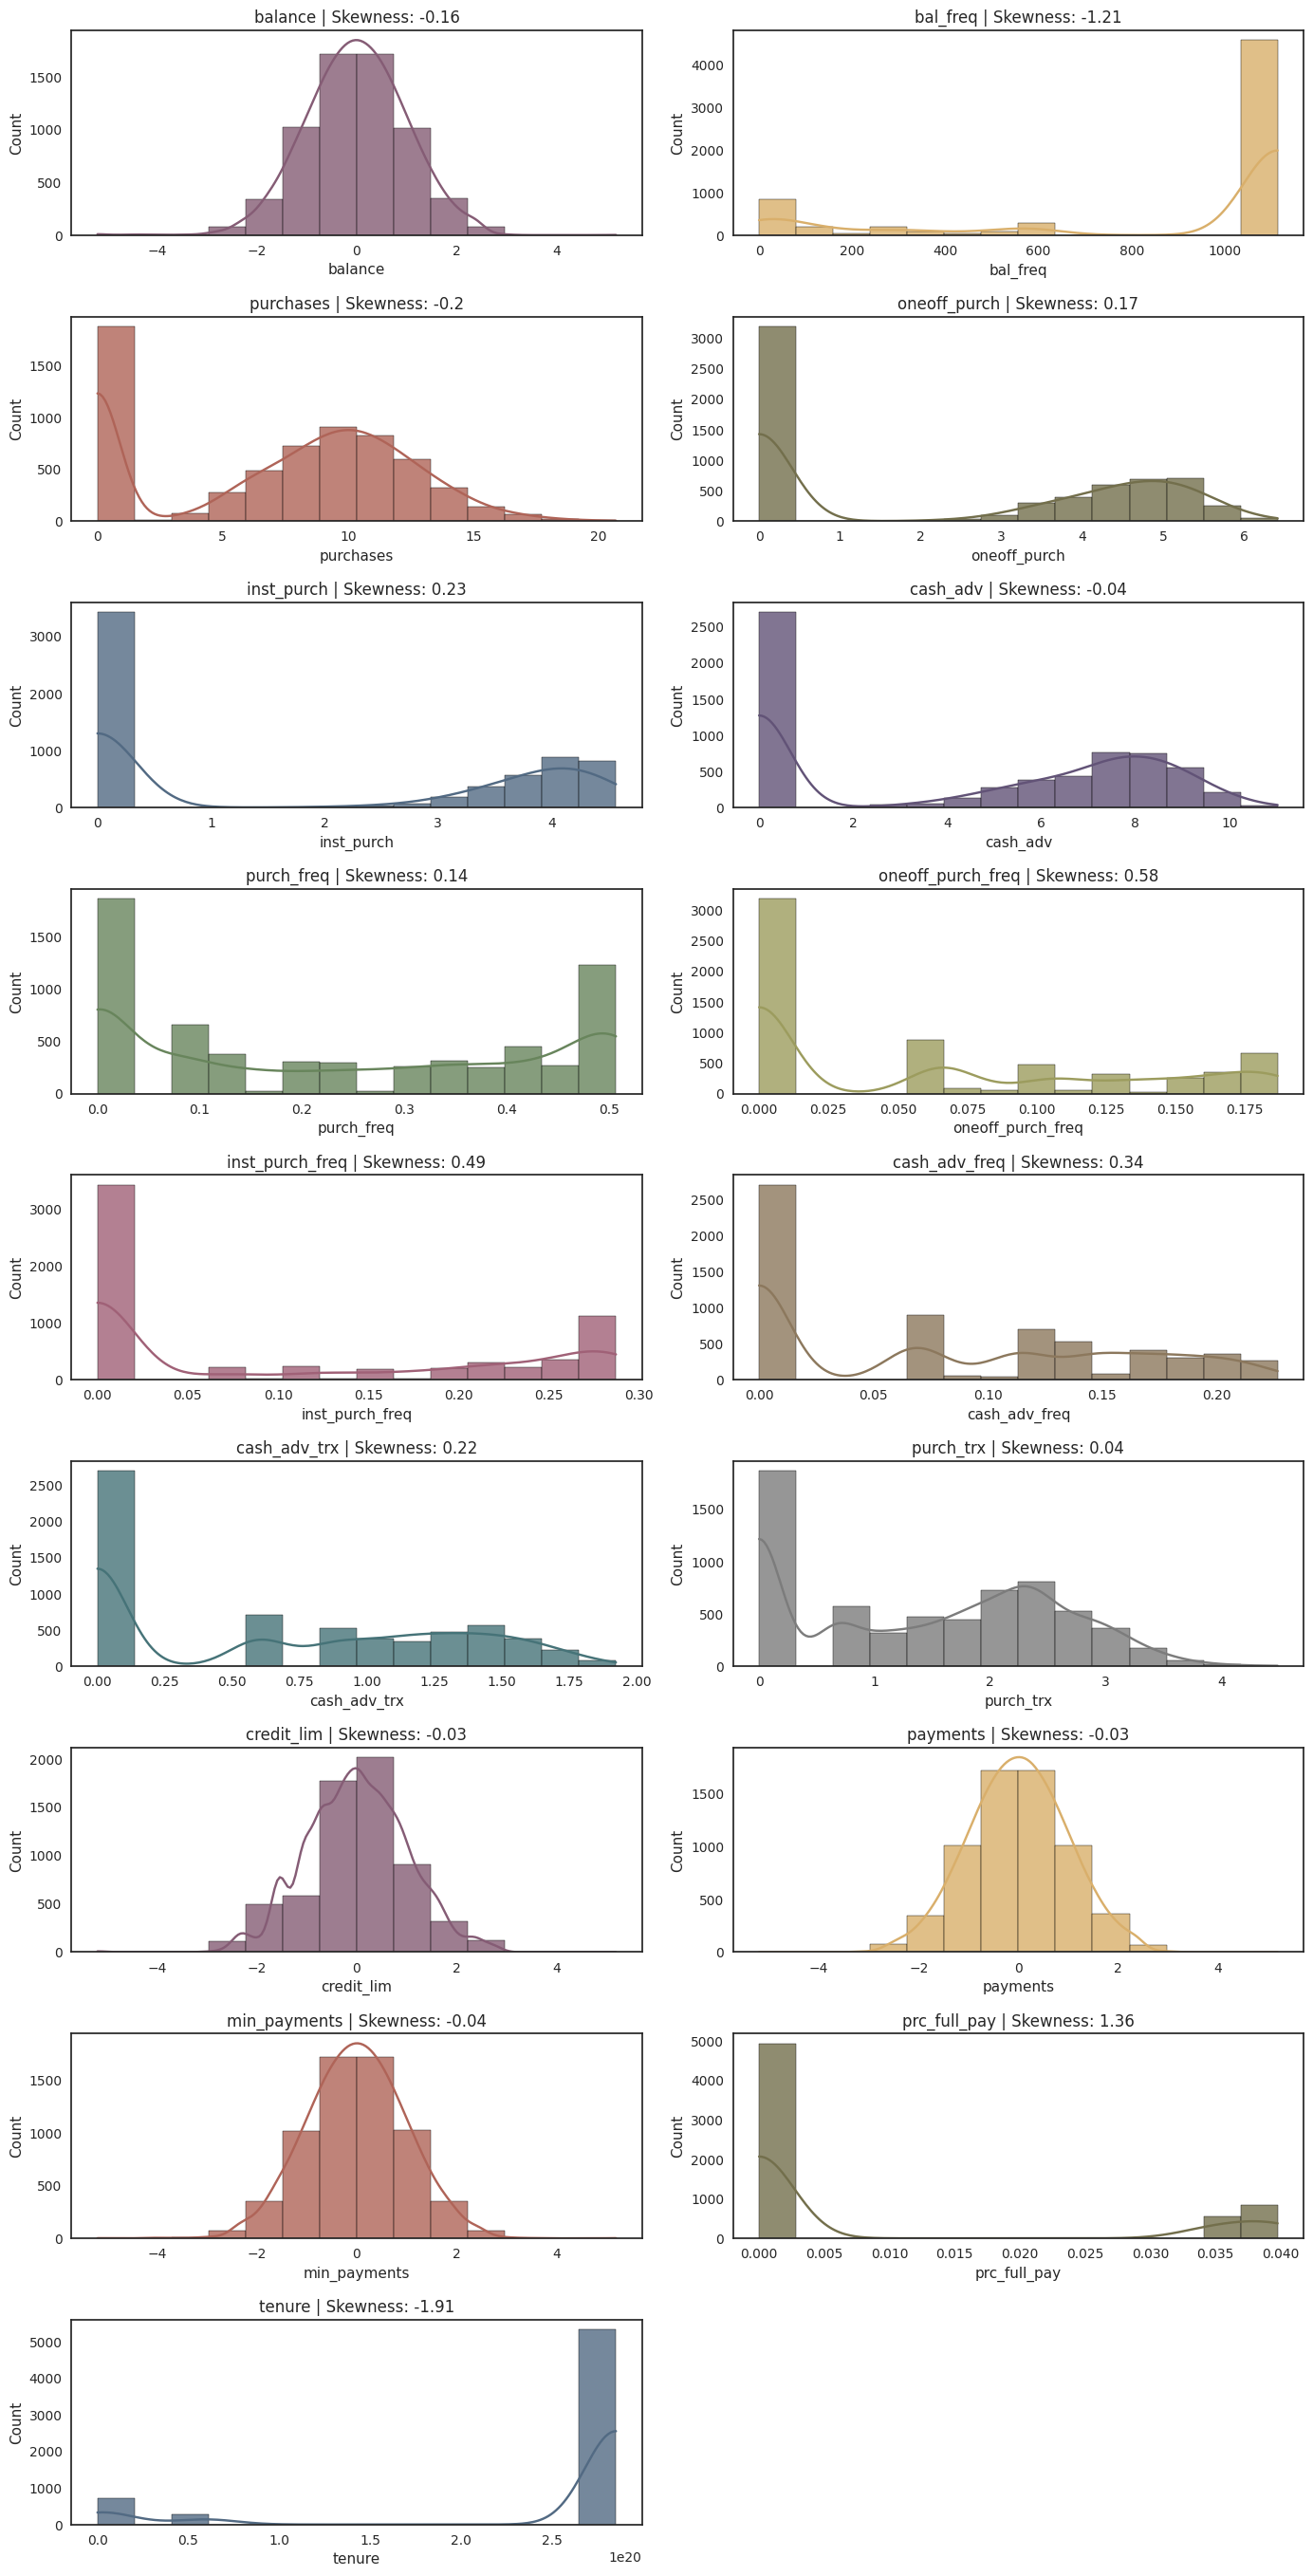

In [21]:
num_columns = customers_df.select_dtypes(include=['int64', 'float64']).columns

sns.set_style('white')
plt.figure(figsize=(14, len(num_columns) * 3))

for idx, feature in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 2, idx)
    color_idx = (idx - 1) % len(antique_palette)
    sns.histplot(customers_df[feature], bins = 'sturges', kde = True, color = antique_palette[color_idx], alpha = 0.8, 
                     edgecolor = 'black')
    plt.title(f"{feature} | Skewness: {round(customers_df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

Despite the applied transformations, many variables remained skewed. In my opinion, this is caused by a high number of customers who did not make purchases. Quantile transformations were particularly successful in variables such as: **'balance'**, **'credit_lim'**, **'payments'** and **'min_payments'**. However, Yeo-Johnson transformations in many cases created **zero-inflated Poisson distributions**. These distributions are difficult to manage because there are high numbers of zeros.

There were many attempts to remove the remaining skewness, but all applied methods failed, including Winsorization. The best move would be to split the data into two separate datasets based on value criteria, where observations with zero values would become part of one dataset and attributes with non-zero values would be part of another dataset.

To be honest, I am not going to do that because this project would become unreadable after such a step. I prefer to remove the most skewed variables in the next part of the project.

## 5.2 Data Scaling <a id="section_5_2"></a>

Data Scaling involves adjusting the range or distribution of the data to make it more suitable for analysis. Scaling can improve the performance of machine learning algorithms and ensure that features contribute equally to the model. Whats more it makes data visuzalization more readable, because it reduces range of possible values to visualize.

In [22]:
scaler = MinMaxScaler()
customers_arr = scaler.fit_transform(customers_df)

# 6. Data Reduction <a id="chapter6"></a>

Data Reduction is aimed at simplifying and reducing the amount of data while preserving its essential characteristics. This process can help improve computational efficiency, reduce storage requirements, and enhance model performance by removing noise and irrelevant features. 

## 6.1 Searching Highly Correlated Variables <a id="section_6_1"></a>

<Axes: title={'center': 'Pearson Correlation of Features'}>

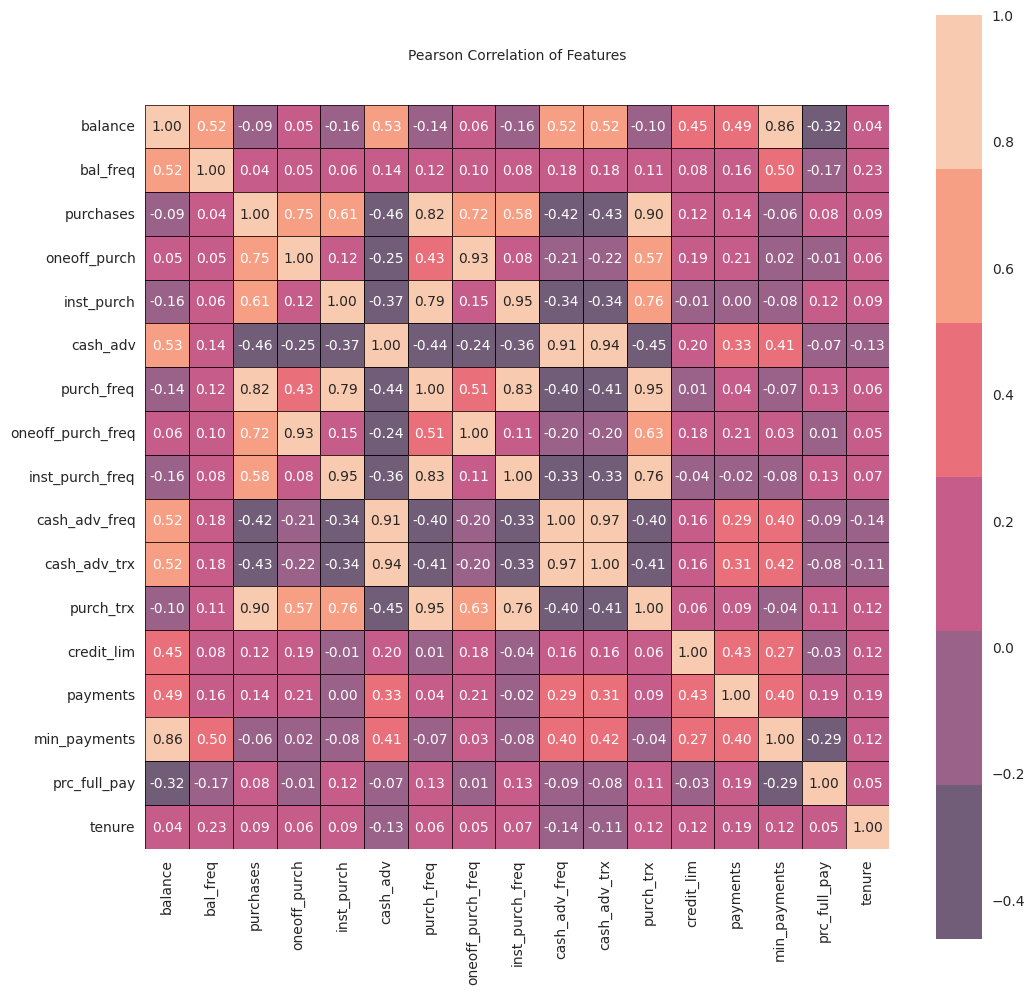

In [23]:
plt.figure(figsize=(12, 12))
plt.title('Pearson Correlation of Features', y = 1.05, size = 10)
sns.heatmap(pd.DataFrame(customers_arr, columns = num_columns).corr(), square = True, linewidths=0.5, linecolor='black', 
            cmap = sns.color_palette(palette='rocket'), annot = True, annot_kws = {"size": 10}, alpha = 0.7, fmt = '.2f')

In the correlation matrix visible above, you can see that some variables are not correlated, whereas other variables are strongly connected. I am going to use PCA, so at this point, I am not making use of this information.

As I mentioned it earlier, columns that still have high skewness, are removed from the dataset.

In [24]:
customers_arr = np.delete(customers_arr, np.s_[1, 2, 7, 8, 9, 10, 11, 15, 16], axis = 1) 

In [25]:
customers_df = customers_df.drop(['bal_freq', 'purchases', 'oneoff_purch_freq', 'inst_purch_freq', 'cash_adv_freq',
                                  'cash_adv_trx', 'prc_full_pay', 'tenure'], axis='columns')

## 6.2 Principal Component Analysis (PCA) <a id="section_6_2"></a>

Principal Component Analysis (PCA) is a popular dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional form while retaining as much variance as possible. By creating new components, it removes correlations between the original variables. However, skewness remains, which is why it is crucial to address skewness earlier.

In [26]:
pca = PCA()
customers_pca = pca.fit_transform(customers_arr)

The explained variance ratio versus the number of principal components is a crucial plot in Principal Component Analysis (PCA). This plot helps determine the number of principal components to retain by showing the amount of variance each principal component captures from the data.

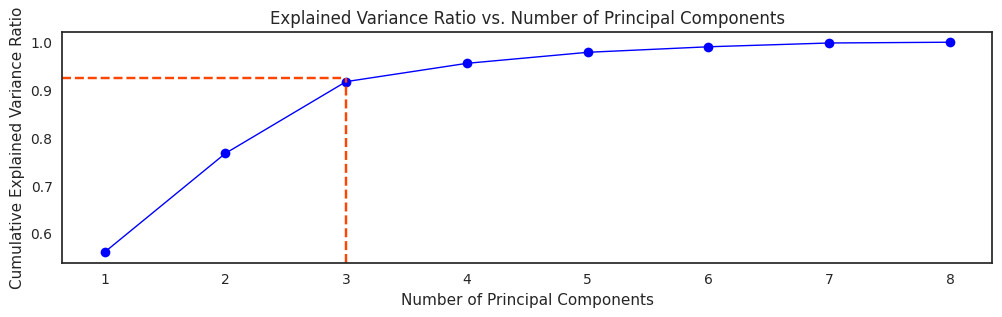

In [27]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

plt.figure(figsize = (12, 3))
sns.set_style('white')
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker = 'o', color = 'blue', linewidth = 1)
plt.axvline(3, 0, 0.8, color = 'orangered', linestyle = '--')
plt.axhline(0.925, 0, 0.3, color = 'orangered', linestyle = '--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

I would like to use three principal components for 3D scatter plots. These components capture about 95% of the cumulative explained variance, ensuring that most of the important information in the dataset is retained while reducing its dimensionality.

In [28]:
pca = PCA(n_components = 3)
customers_pca = pca.fit_transform(customers_arr)
loadings = pd.DataFrame(pca.components_, columns = customers_df.columns[1:])

In the 3D biplot shown below, a reduced size dataset is visualized along with the features projected onto the first three principal components.

In [29]:
# 3D scatterplot visualization
fig = px.scatter_3d(customers_pca, 
        x = customers_pca[:, 0], 
        y = customers_pca[:, 1], 
        z = customers_pca[:, 2],
        template = 'plotly_white',
        labels = {'x': 'PC0', 'y': 'PC1', 'z': 'PC2'})

scaler = 1.2

# Arrows visualization
for i in range(len(loadings.columns)):
    fig.add_trace(go.Scatter3d(
        x = [0, loadings.iloc[0, i] * scaler],
        y = [0, loadings.iloc[1, i] * scaler],
        z = [0, loadings.iloc[2, i] * scaler],
        mode = 'lines+text',
        text = ['', f'{loadings.columns[i]}'],
        textposition = 'top center',
        textfont = dict(color = 'green'),
        line = dict(color = 'red', width = 6),
        showlegend = False
    ))

# Update hovertemplate
fig.update_traces(
    marker = dict(size = 6, opacity = 0.5),
    hovertemplate = '<br>PC0: %{x}<br>PC1: %{y}<br>PC2: %{z}<extra></extra>',
    selector = dict(type = 'scatter3d')
)

# Update layout
fig.update_layout(
    margin = dict(l = 0, r = 0, b = 0, t = 0),
    title = {
        'text': '3D Biplot',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()


The biplot provides many useful insights that will later be used to interpret the results of clustering algorithms. First of all, it shows the importance of variables: the longer the arrow, the greater the influence of the corresponding variable on the construction of the PCA space. By observing the biplot, it is evident that the highly influential variables are **purch_freq**, **inst_purch**, **cash_adv**, and **purch_trx**. The remaining variables have very little impact on the construction of the PCA space. The variables **purch_freq**, **inst_purch**, **cash_adv**, and **purch_trx** are highly correlated because their arrows are close to each other (the angles between the variable vectors are close to 0). On the other hand, **inst_purch**, **cash_adv**, and **purch_trx** have low positive correlations with the mentioned variables or even negative correlations. Negative correlations can be observed when variable arrows are inversely directed. The biplot also enables the observation of how much each variable "contributes" to different observations. If data points are close to the arrow of a given variable, it means that this variable has a significant impact on that particular observation.

# 7. Clustering methods <a id="chapter7"></a>

There are many clustering algorithms. They can be grouped into the following families:

- **Centroid-based Algorithms** focus on minimizing the distance of data points from the cluster centers. <br>
Example:  K-Means

- **Density-based Algorithms** identify clusters as areas of high point density separated by areas of low point density. <br>
Example: DBSCAN

- **Hierarchical Algorithms** create a hierarchy of clusters through iterative merging or splitting of clusters. <br>
Example: Agglomerative Clustering

- **Model-based Algorithms** assume that the data is generated from a mixture of probabilistic distributions. <br>
Example: Gaussian Mixture Model

- **Graph-based Algorithms** use graph theory to find clusters, often based on point similarity or neighborhood. <br>
Example: Spectral Clustering

- **Message Passing Algorithms** send messages between data points to identify cluster exemplars. <br>
Example: Affinity Propagation

## 7.1 K-Means <a id="section_7_1"></a>

K-Means clustering is an iterative algorithm used to partition a set of observations into k clusters, where each observation belongs to the cluster with the nearest mean. This technique aims to minimize the sum of squared distances between the data points and their corresponding cluster centroids.

**Advantages**:
- K-Means is easy to understand and implement.
- it can efficiently handle large datasets.
- it quickly adapts to new examples.
- can generalize clusters for different shapes and sizes.

**Disadvantages**
- outliers can significantly affect the clustering results.
- determining the optimal number of clusters k can be challenging.
- performance decreases as the number of dimensions increases.

### 7.1.1 Silhouette Score Plot <a id="sub_section_7_1_1"></a>

The silhouette score is a metric used to evaluate the quality of a clustering algorithm's results. It is calculated as the mean silhouette coefficient for all instances in the dataset. The silhouettescore allows to choose optimal value of k in K-Means algorithm in order to obtain accurate results.

In [30]:
def visualizing_silhouette_plot(data_arr, method):
    silh_scores = []
    k = range(2, 10)

    for n in k:
        m = method(n_clusters = n)
        m.fit(data_arr)
        labels = m.labels_
        silh_scores.append(silhouette_score(data_arr, labels, metric = 'euclidean'))

    plt.figure(figsize = (12, 3))
    sns.set_style('white')
    plt.plot(k, silh_scores, marker='o', color = 'blue', alpha = 0.8, linewidth = 1)
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title(f'Silhouette analysis for optimal k')
    plt.show()

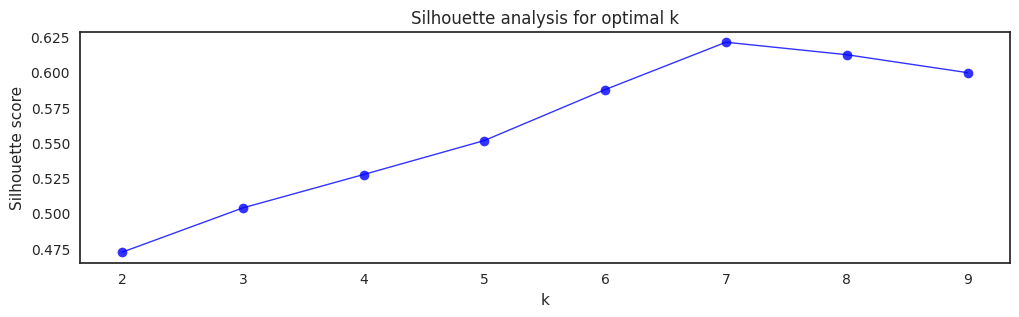

In [31]:
visualizing_silhouette_plot(customers_pca, KMeans)

As you can see, this visualization confirms that k = 7 is a very good choice, it also underlines the fact that
k = 8 is quite good as well. These values are much better then k = 5 or k = 6. 0.625 silhouette score suggests that, on average, the objects are well-clustered.

### 7.1.2 Silhouette Diagram <a id="sub_section_7_1_2"></a>

A silhouette diagram is a graphical representation used to visualize the quality of a clustering solution. It displays the silhouette coefficient for each instance, helping to understand how well each point fits within its cluster relative to other clusters.

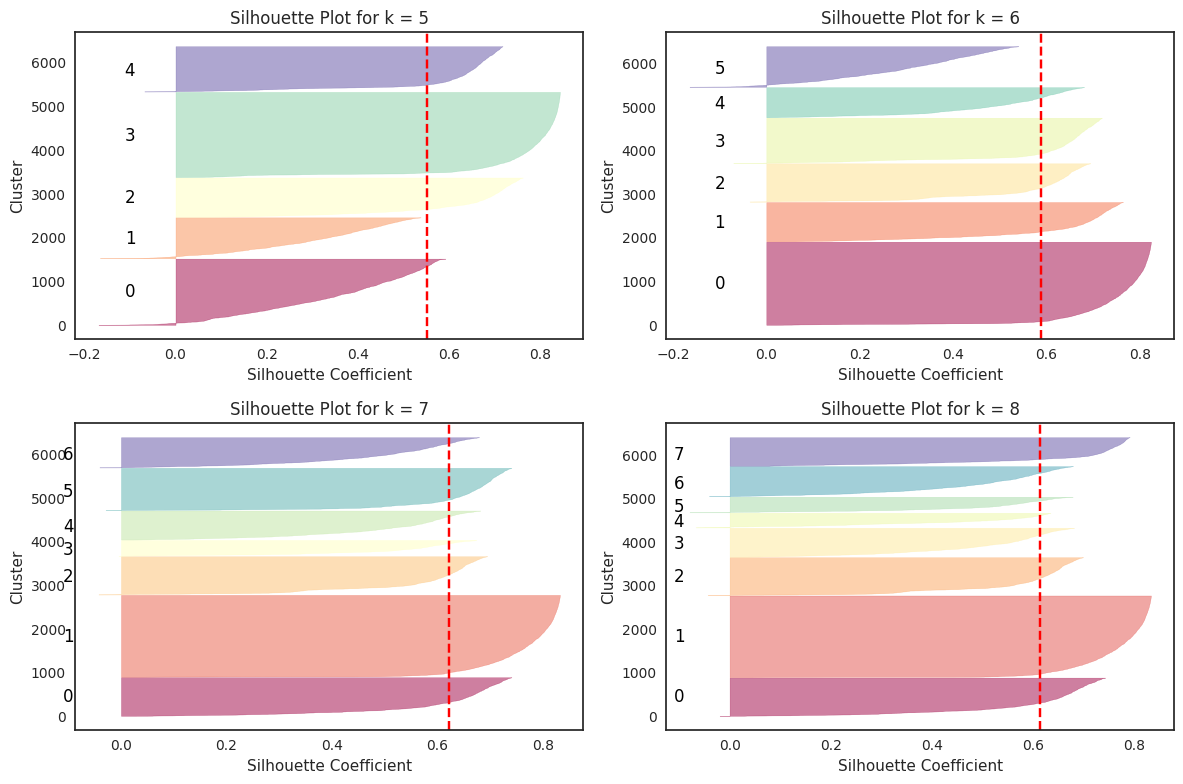

In [32]:
sns.set_style('white')
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i, k in enumerate(range(5, 9)):
    km = KMeans(n_clusters = k, init='k-means++', n_init = 10, max_iter = 100, random_state = 42)
    q, mod = divmod(i, 2)
    sv = SilhouetteVisualizer(km, colors='Spectral', ax = ax[q, mod])
    sv.fit(customers_pca)
    
    ax[q, mod].set_xlabel('Silhouette Coefficient')
    ax[q, mod].set_ylabel('Cluster')
    ax[q, mod].set_title(f'Silhouette Plot for k = {k}')
    
    # Cluster labels on the plot
    for cluster in range(k):
        y_lower = sum(len(customers_pca[km.labels_ == j]) for j in range(cluster))
        y_upper = y_lower + len(customers_pca[km.labels_ == cluster])
        y_avg = (y_lower + y_upper) / 2

        ax[q, mod].text(-0.1, y_avg, str(cluster), va = 'center', ha = 'center', fontsize = 12, color = 'black')

plt.tight_layout()
plt.show()

There are two criteria for choosing the optimal k value based on the observation of Silhouette diagrams:
1) There should not be clusters that are below the average silhouette score (indicated with the red-dotted line). <br>
2) Wide fluctuations can be noticed in almost all diagrams. However, the least number of fluctuations is in the diagram where the k number is optimal.

By taking these criteria into account, there is no doubt that, in this case, the optimal **k = 7**.

### 7.1.3 Algorithm <a id="sub_section_7_1_3"></a>

1) Select the Value of K: Decide on the number of clusters k to be formed. <br>
2) Initialize Centroids: Choose k random points from the dataset to serve as the initial cluster centroids.<br>
3) Assign Data Points to Clusters: Assign each data point to the nearest centroid based on Euclidean distance, forming predefined clusters.<br>
4) Update Centroids: Calculate the new centroids of the clusters by computing the mean of all data points in each cluster.<br>
5) Reassign Data Points: Reassign each data point to the nearest new centroid. Repeat this step until no reassignment occurs, indicating that the clusters have stabilized.<br>
6) Check for Convergence: If any reassignment occurs, go back to the previous step. Otherwise, proceed to the next step.<br>
7) Completion: The algorithm finishes when clusters no longer change.<br>

In [33]:
km = KMeans(n_clusters = 7)
clusters_km = km.fit_predict(customers_pca).astype(str)
centroids_km = km.cluster_centers_

In [34]:
def visualizing_3d_clusters(data_arr, clusters, centroids, title):
    colors = px.colors.qualitative.Pastel

    # Create hovertext for clusters
    hovertext = ['Cluster: {}'.format(cluster) for cluster in clusters]

    # Create scatter plot for customers PCA
    fig = px.scatter_3d(data_arr, 
                x = customers_pca[:, 0], 
                y = customers_pca[:, 1], 
                z = customers_pca[:, 2],
                color = clusters,
                template = 'plotly_white',
                color_discrete_sequence = colors,
                labels={'x': 'PC0', 'y': 'PC1', 'z': 'PC2'})

    # Update the hovertemplate to include the custom hovertext
    fig.update_traces(
                marker = dict(size = 6,
                line = dict(width=0.1,
                color = 'DarkSlateGrey')),
                hovertemplate = '<b>%{text}</b><br>PC0: %{x}<br>PC1: %{y}<br>PC2: %{z}<extra></extra>',
                text = hovertext,
                selector = dict(type = 'scatter3d'))

    if centroids is not None:
        # Create a separate scatter plot for centroids
        centroids_trace = go.Scatter3d(
                    x = centroids[:, 0], 
                    y = centroids[:, 1], 
                    z = centroids[:, 2],
                    mode = 'markers',
                    marker = dict(size=5, color='red', symbol='x'),
                    name = 'Centroids',
                    hovertemplate = '<b>Centroid</b><br>PC0: %{x}<br>PC1: %{y}<br>PC2: %{z}<extra></extra>')

        # Add centroids trace to the main figure
        fig.add_trace(centroids_trace)

    # Update layout
    fig.update_layout(
                margin = dict(l = 0, r = 0, b = 0, t = 0),
                title = {
                    'text': title,
                    'y': 0.9,
                    'x': 0.5,
                    'xanchor': 'right',
                    'yanchor': 'top'},
                legend_title = "clusters",
                legend = dict(
                    yanchor = "top",
                    y = 0.99,
                    xanchor = "right",
                    x = 0.01),
                showlegend = True)
    
    fig.show()

In [35]:
visualizing_3d_clusters(customers_pca, clusters_km, centroids_km, 'K-Means Clustering')

## 7.2 DBSCAN <a id="section_7_2"></a>

DBSCAN is a density-based clustering algorithm that identifies clusters based on the density of data points in the feature space. It groups together points that are closely packed (points with many nearby neighbors) and marks points that are in low-density regions (noise points or outliers).

**Advantages**<br>
- does not require the number of clusters to be specified in advance.
- inherently identifies outliers as noise points, making it robust to the presence of outliers in the dataset.
- can find clusters of arbitrary shape and size, making it more versatile than methods like K-Means that assume spherical clusters.

**Disadvantages**<br>
- eps and min_samples can be difficult to determine.
- struggles with datasets that have clusters of varying densities.

### 7.2.1 k-NN Distance Plot <a id="sub_section_7_2_1"></a>

A k-NN Distance Plot is used to help determine the appropriate value of **eps** in the DBSCAN clustering algorithm. The plot helps identify the distance at which the points start to be considered outliers, which in turn helps in defining the clusters. An optimal **eps** is chosen by detecting the **eps** value for which plot forms elbow shape (marked with red line on provided plot).

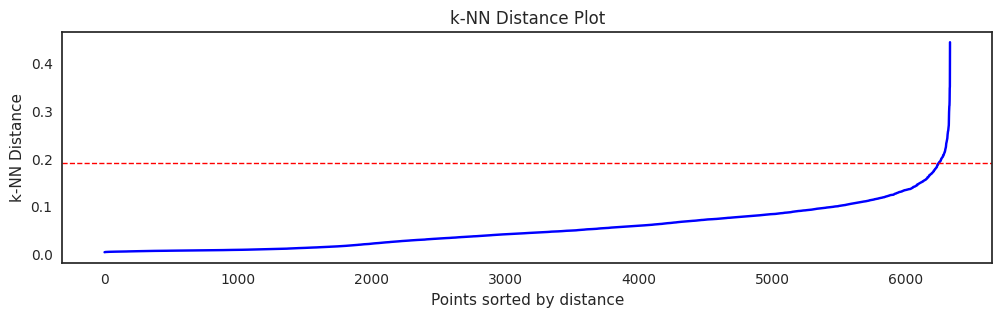

In [36]:
nn = NearestNeighbors(n_neighbors = 20)
neighbors = nn.fit(customers_pca)
distances, indices = neighbors.kneighbors(customers_pca)
distances = np.sort(distances[:, 19])

plt.figure(figsize=(12, 3))
plt.plot(distances, color = 'blue')
plt.axhline(y = 0.19, color = 'red', linewidth = 1, linestyle = '--')
plt.title('k-NN Distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-NN Distance')
plt.show()

The **KneeLocator()** from the **kneed library** is a useful tool to automatically find the **elbow point** in a plot, which is particularly handy for determining the **optimal eps** value for DBSCAN. 

In [37]:
kl = KneeLocator(range(len(distances)), distances, S = 1.0, curve = 'convex', direction = 'increasing')
optimal_eps = distances[kl.elbow]
print(f'Optimal eps: {optimal_eps}')

Optimal eps: 0.1924543543093224


Both plot and function results indicate that optimal **eps** value is 0.19.

### 7.2.2 Searching optimal min_samples <a id="sub_section_7_2_2"></a>

It is very important to determine the second parameter, **min_samples**, which represents the minimum number of samples required to form a dense region that will be classified as a core point.

In [38]:
optimal_min_samples = None
best_silhouette_score = -1

for min_samples in range(5, 100, 5):
    dbscan = DBSCAN(eps = optimal_eps, min_samples = min_samples)
    clusters = dbscan.fit_predict(customers_pca)
    
    if len(set(clusters)) > 1:
        score = silhouette_score(customers_pca, clusters)
        
        if score > best_silhouette_score:
            best_silhouette_score = score
            optimal_min_samples = min_samples

print(f'Optimal min_samples: {optimal_min_samples} and best Silhouette Score: {best_silhouette_score}')

Optimal min_samples: 75 and best Silhouette Score: 0.6167766733124679


### 7.2.3 Algorithm <a id="sub_section_7_2_3"></a>

1) Start with an arbitrary point in the dataset that has not been visited. <br>
2) If the selected point has at least min_samples points within an eps radius, it is marked as a core point, and a new cluster is started.<br>
3) The algorithm recursively visits all neighbors of the core point. If a neighbor is also a core point, it will recursively visit all of its neighbors, and so on. Border points directly connected to the core point are added to the current cluster.<br>
4) If a point does not have enough neighbors to be a core point and is not part of any cluster, it is labeled as noise (outlier).<br>
5) Continue the process until all points in the dataset are either assigned to a cluster or marked as noise.<br>

In [39]:
dbscan = DBSCAN(eps = optimal_eps, min_samples = optimal_min_samples)
clusters_dbscan = dbscan.fit_predict(customers_pca).astype(str)

In [40]:
visualizing_3d_clusters(customers_pca, clusters_dbscan, None, 'DBSCAN Clustering')

## 7.3 Agglomerative Clustering <a id="section_7_3"></a>

Agglomerative Clustering builds nested clusters by successively merging or dividing them. It begins with each observation in its own cluster and iteratively merges the closest pairs of clusters until a single cluster remains or the desired number of clusters is reached. The proximity between clusters is determined by various linkage criteria.

**Advantages**
- can effectively identify clusters of different shapes and sizes.
- dendrogram can be used in order to determine the appropriate number of clusters.
- the hierarchical structure can help in minimizing the impact of outliers, as they may not be merged into any cluster until the later stages.

**Disadvantages**
- is generally more computationally expensive, making it less suitable for very large datasets.
- the results can vary significantly depending on the chosen linkage criterion, which can make the selection of the best method challenging.
- can struggle with high-dimensional data, leading to reduced performance and interpretability.

### 7.3.1 Denrogram <a id="sub_section_7_3_1"></a>

The hierarchical nature of the algorithm allows for the creation of a dendrogram, which provides a visual representation of the clustering process and helps in determining the appropriate number of clusters.

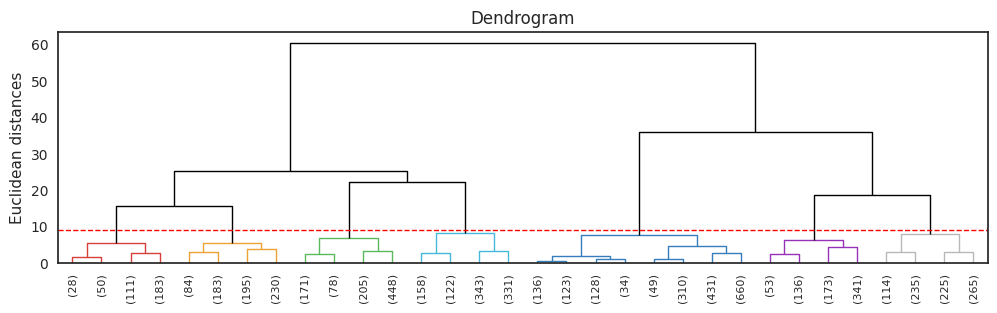

In [41]:
locuszoom_palette = ['#D43F3AFF', '#EEA236FF', '#5CB85CFF', '#46B8DAFF', '#357EBDFF', '#9632B8FF', '#B8B8B8FF']

plt.rcParams['lines.linewidth'] = 1
plt.figure(figsize = (12, 3))

hierarchy.set_link_color_palette(locuszoom_palette)

hierarchy.dendrogram(
    hierarchy.linkage(customers_pca, 'ward'), 
    truncate_mode = 'level', 
    p = 4,
    leaf_rotation = 90,
    leaf_font_size = 8, 
    color_threshold = 9, 
    above_threshold_color = 'black')

plt.axhline(y = 9, color = 'red', linewidth = 1, linestyle = '--')
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

### 7.3.2 Algorithm <a id="sub_section_7_3_2"></a>

1) Start with Each Data Point as a Single Cluster. <br>
2) Compute the Distance Matrix.<br>
3) Identify the Closest Pair of Clusters.<br>
4) Merge the Closest Clusters.<br>
5) Update the Proximity Matrix.<br>
6) Repeat Steps 3-5.<br>
7) Output the Clustering Result.<br>

In [42]:
ac = AgglomerativeClustering(n_clusters = 7, linkage = 'ward')
clusters_ac = ac.fit_predict(customers_pca).astype(str)

In [43]:
visualizing_3d_clusters(customers_pca, clusters_ac, None, 'Agglomerative Clustering')

## 7.4 Affinity Propagation <a id="section_7_4"></a>

Affinity Propagation identifies exemplars, which are representative data points, to form clusters. Unlike other clustering algorithms that require the number of clusters to be specified in advance, Affinity Propagation determines the number of clusters based on the data. It works by sending messages between data points until a high-quality set of exemplars and corresponding clusters emerges.

**Advantages**
- automatically determines the number of clusters based on the data, which can be beneficial when the optimal number of clusters is unknown.
- selects actual data points as cluster centers (exemplars), making the clusters more interpretable.
- can work with any similarity measure, not just distance metrics, allowing for flexibility in defining how points are related.

**Disadvantages**
- can be computationally expensive, especially for large datasets, as it requires the calculation and storage of a similarity matrix for all pairs of data points.
- he results can be sensitive to the choice of the damping factor and the preference parameter, which determines the number of clusters. Tuning these parameters can be challenging and may require trial and error.
- is scalable to some extent, it can struggle with very large datasets due to the need to compute and store a similarity matrix, leading to high memory usage.
- can face challenges in high-dimensional spaces, where distances between points become less meaningful.

**Algorith**:
1) Compute Similarity Matrix <br>
2) Set Parameters (damping factor, preference) <br>
3) Initialize Messages (responsibility and availability) <br>
4) Update Responsibilities <br>
5) Update Availabilities <br>
6) Iterate Until Convergence <br>
7) Determine Exemplars <br>
8) Assign Clusters Based on Exemplars <br>
9) Output Clusters <br>

In [44]:
ap = AffinityPropagation(preference = -20, damping = 0.95) # values of parameters are results of trial and error.
clusters_ap = ap.fit_predict(customers_pca).astype(str)

In [45]:
visualizing_3d_clusters(customers_pca, clusters_ap, None, 'Affinity Propagation Clustering')

## 7.5 Spectral Clustering <a id="section_7_5"></a>

Spectral Clustering is a technique that uses the eigenvalues of a similarity matrix to reduce dimensionality before applying a clustering algorithm. It operates in two main steps: 
- first, it constructs a similarity matrix based on pairwise data relationships,
- second, it performs dimensionality reduction using the eigenvectors of the matrix to cluster the data points in a lower-dimensional space.

**Advantages**
- can identify clusters that have complex shapes and structures, which makes it more flexible than methods like K-Means that assume spherical clusters.
- Spectral Clustering does not assume a specific cluster shape or distribution, making it suitable for data with irregularly shaped clusters.
- is effective in clustering data points that form non-convex clusters, which may be challenging for traditional clustering methods.

**Disadvantages**
- can be computationally expensive, especially for large datasets, due to the need to compute and decompose the similarity matrix (eigenvalue decomposition).
- the performance of Spectral Clustering is highly dependent on the choice of the similarity matrix and its parameters. Poor choices can lead to suboptimal clustering results.
- while the algorithm does not require the number of clusters to be specified in the initial step, it still requires the number of clusters to be chosen in the final clustering step (e.g., applying K-Means after dimensionality reduction), which can be challenging.

### 7.5.1 Silhouette Score Plot <a id="sub_section_7_5_1"></a>

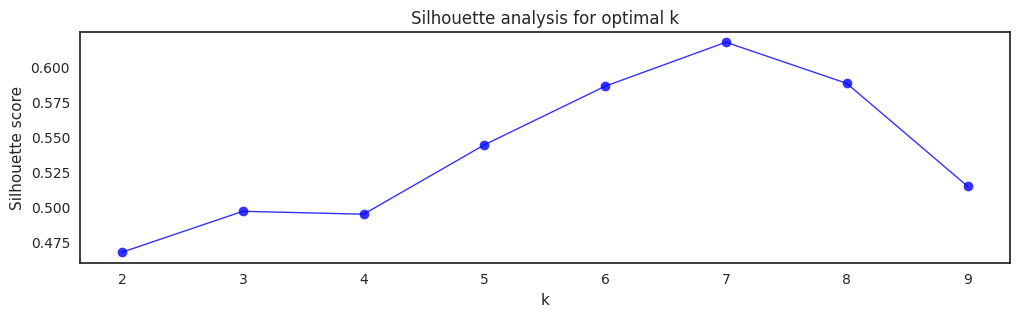

In [46]:
visualizing_silhouette_plot(customers_pca, SpectralClustering)

As you can see, this visualization confirms that k = 7 is a very good choice. These values are much better then k = 5, k = 6 or k = 8. 0.650 silhouette score suggests that, on average, the objects are well-clustered.

### 7.5.2 Algorithm <a id="sub_section_7_5_2"></a>

1) Construct the Similarity Matrix <br>
2) Compute the Affinity Matrix (if necessary) <br>
3) Construct the Graph Laplacian <br>
4) Compute Eigenvectors of the Laplacian <br>
5) Form the Reduced Data Matrix <br>
6) Apply Clustering Algorithm (e.g., K-Means) <br>
7) Assign Clusters <br>
8) Output Clusters <br>

In [47]:
sc = SpectralClustering(n_clusters = 7)
clusters_sc = sc.fit_predict(customers_pca).astype(str)

In [48]:
visualizing_3d_clusters(customers_pca, clusters_sc, None, 'Spectral Clustering')

## 7.6 Gaussian Mixture Model <a id="section_7_6"></a>

Gaussian Mixture Models are a type of probabilistic model used for clustering that assumes data points are generated from a mixture of several Gaussian distributions. Each Gaussian distribution represents a cluster, and the goal is to estimate the parameters of these distributions to best fit the data.

**Advantages**
- can model clusters of different shapes and sizes, as they do not assume spherical clusters but can model ellipsoidal clusters based on the covariance structure.
- provide a probabilistic assignment of data points to clusters, allowing for soft clustering where data points can belong to multiple clusters with varying degrees of membership.
- nature of GMMs makes them effective in scenarios where clusters overlap or are not well-separated.

**Disadvantages**
- can be computationally expensive, especially for large datasets, due to the iterative estimation of parameters and the need to compute the likelihood for each data point.
- assume that the data is generated from Gaussian distributions. If the true underlying data distribution significantly deviates from this assumption, the model's performance may be affected.
- can struggle with high-dimensional data due to the increased complexity in estimating the covariance matrices and the risk of overfitting.

### 7.6.1 BIC / AIC criterion <a id="sub_section_7_6_1"></a>

The BIC (Bayesian Information Criterion) and AIC (Akaike Information Criterion) are statistical criteria used for model selection, particularly when comparing models with different values of parameters. In these case they are used to find optimal numer of clusters for Gaussian Mixture Model.

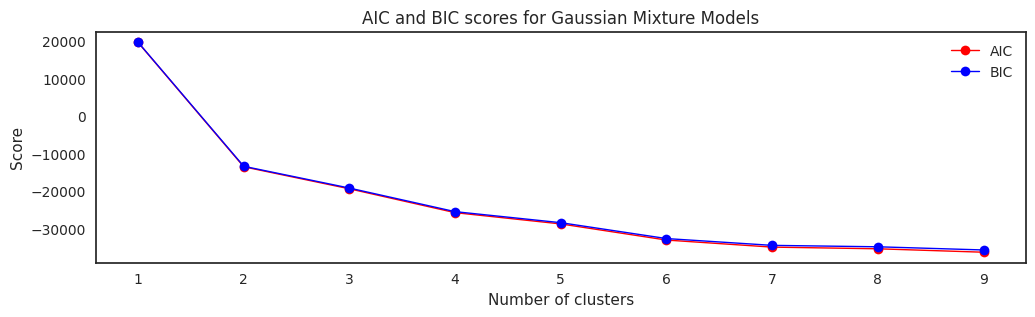

In [49]:
aic_scores, bic_scores = [], []
n_clusters = range(1, 10)

for n in n_clusters:
    gm = GaussianMixture(n_components = n, init_params = 'kmeans')
    gm.fit(customers_pca)
    aic_scores.append(gm.aic(customers_pca))
    bic_scores.append(gm.bic(customers_pca))

plt.figure(figsize=(12, 3))
plt.plot(n_clusters, aic_scores, label = 'AIC', marker = 'o', color = 'red')
plt.plot(n_clusters, bic_scores, label = 'BIC', marker = 'o', color = 'blue')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('AIC and BIC scores for Gaussian Mixture Models')
plt.legend()
plt.show()

The lowest scores are obtained when the number of clusters is either 8 or 9. I recommend using **n_components = 8**.

### 7.6.2 Algorithm <a id="sub_section_7_6_2"></a>

1) Initialize Parameters. <br>
2) Expectation Step (E-Step). <br>
3) Maximization Step (M-Step). <br>
4) Repeat Steps 2 and 3. <br>
5) Assign Clusters. <br>
6) Output Clusters. <br>

In [50]:
gm = GaussianMixture(n_components = 8, init_params = 'kmeans')
clusters_gm = gm.fit_predict(customers_pca).astype(str)

In [51]:
visualizing_3d_clusters(customers_pca, clusters_gm, None, 'Gaussian Mixture Model Clustering')

# 8. Summary <a id="chapter8"></a>

The project explored a range of clustering techniques and data reduction methods. Each method provided unique insights into the data, highlighting their respective strengths and weaknesses. The choice of technique was tailored to the nature of the data and the specific requirements of the analysis. This approach led to successful bank customer segmentation, with clusters associated with variables that represent different customer behaviors. By applying these insights, the marketing team can develop strategies to effectively influence bank customers.